# Precisione dello stato stazionario e principi di progettazione

Nei notebook precedenti abbiamo approfondito le prestazioni dei sistemi di feedback. Questo notebook si concentra su due aree chiave: precisione in condizioni stazionarie e un esempio di progettazione completo.

Il nostro obiettivo è consolidare la tua comprensione di questi concetti attraverso un approccio pratico.

## Precisione allo stato stazionario

La precisione allo stato stazionario è un aspetto cruciale dei sistemi di controllo, poiché indica la capacità del sistema di mantenere un output costante quando sottoposto a un input costante. Abbiamo già esaminato questo concetto e ora lo rivisiteremo, aggiungendo una prospettiva quantitativa.

<table>
<tr>
    <img src="../pics/21_Steady_State_Accuracy_And_Design_Principles_block_diagram
.png?1" alt="21_Steady_State_Accuracy_And_Design_Principles_block_diagram
" style="width:450px;"/>
</tr></table>

Approfondiamo la descrizione quantitativa dell'accuratezza in stato stazionario utilizzando il diagramma a blocchi.

Ci concentreremo sulla relazione tra il modello dell'impianto $ G(s) $, il controller $ D(s) $ e come interagiscono con l'input del comando $ R $, l'output $ Y $ e l'errore $ E $.

La presenza di un disturbo può essere analizzata in modo simile.

Come abbiamo già visto più volte:

1. **Modello impianto $ G(s) $**:
   - Rappresenta la funzione di trasferimento del sistema che stiamo controllando. È un modello matematico del comportamento dinamico del sistema.

2. **Controller $ D(s) $**:
   - $ D(s) $ è la funzione di trasferimento del controller nel sistema. Definisce come il controller agirà sul segnale di errore per regolare il comportamento del sistema.

3. **Configurazione del sistema di feedback**:
   - Il sistema è configurato in un circuito di feedback in cui l'uscita viene confrontata con l'ingresso per generare un segnale di errore $ E $.

4. **Segnale di errore $ E(s) $**:
   - Questa è una parte fondamentale del ciclo di feedback. $ E(s) $ rappresenta la differenza tra l'output desiderato (ingresso di comando $ R(s) $) e l'output effettivo $ Y(s) $ del sistema.

5. **Input di comando $ R(s) $**:
  - Questo è l'output del sistema desiderato nel dominio di Laplace. Potrebbe essere un gradino, una rampa o qualsiasi altro modulo di input.

6. **Uscita del sistema $ Y(s) $**:
  - L'output effettivo del sistema, rappresentato anche nel dominio di Laplace.

### Dinamica degli errori

In un sistema di controllo, spesso esprimiamo l'errore $ E(s) $ come $ E(s) = R(s) - Y(s) $. In un ciclo di feedback, questo diventa $ E(s) = R(s) - G(s)D(s)E(s) $.

**Riorganizzazione per $ E(s) $**:
Riorganizzando l'equazione di cui sopra, otteniamo

$$ E(s) = \frac{R(s)}{1 + D(s)G(s)} $$

Qui, $D(s)G(s) $ rappresenta il guadagno totale del circuito del sistema.


#### Perché dividere $ G(s) $ e $ D(s) $?

- Considerando separatamente $ G(s) $ e $ D(s) $, possiamo studiare il sistema in modo più flessibile, soprattutto quando si considerano diversi tipi di controllori (PD, PI, PID).

- Questa separazione consente un approccio modulare alla progettazione del sistema, in cui l'impianto e il controller possono essere progettati e analizzati in modo indipendente prima di essere combinati.

#### Implicazioni pratiche

- **Flessibilità di progettazione**: diversi controllori (PD, PI, PID) possono essere modellati e testati semplicemente modificando $ D(s) $ senza alterare il modello dell'impianto $ G(s) $.
- **Analisi del sistema**: è possibile valutare facilmente l'impatto delle modifiche del controller sulle prestazioni del sistema, tra cui stabilità, risposta ai transitori ed errore stazionario.
- **Ottimizzazione del controller**: manipolando $ D(s) $, il controller può essere ottimizzato per ottenere le specifiche prestazionali desiderate come errore minimo in stato stazionario, risposta transitoria desiderata e margini di stabilità.

## Rivisitazione del teorema del valore finale

Il teorema del valore finale è uno strumento che usiamo per calcolare l'errore stazionario di un sistema. Ricordiamo il teorema:

$$ e_{ss} = \lim_{s \to 0} sE(s) $$

Dove $ E(s) $ è il segnale di errore nel dominio di Laplace.

Nel nostro caso:

$$ e_{ss} = \lim_{s \to 0} \frac{sR(s)}{(1 + D(s)G(s))} $$

##### Errore di stato stazionario per ingressi standard

Consideriamo tre input standard: gradino, rampa e parabola.

Analizzeremo ogni caso:

1. **Inserimento passo-passo** $ R(s) = \frac{1}{s} $:

   $$ e_{ss} = \lim_{s \to 0} \frac{s}{s(1 + D(s)G(s))} = \lim_{s \to 0} \frac{1}{ 1 + D(s)G(s)} = \frac{1}{1 + \lim_{s \to 0} D(s)G(s)}$$

   Questo si semplifica in $$ e_{ss} = \frac{1}{1 + K_p} $$
   
   dove $ K_p $ è chiamato _costante errore di posizione_.
   
   Invece di specificare l'errore di stato stazionario del sistema su un ingresso di passo unitario, è possibile fare riferimento in modo equivalente alla costante dell'errore di posizione.
   
È importante sottolineare che nell'ambito dei sistemi di controllo della posizione, un ingresso a gradino è sinonimo di un ingresso di posizione. Questo concetto, tuttavia, non si limita ai soli scenari di controllo della posizione. Il principio può essere esteso a vari tipi di sistemi di controllo. Ad esempio, nei sistemi di controllo della temperatura o di controllo del livello del liquido, l'ingresso della fase può rappresentare un cambiamento improvviso della temperatura o del livello desiderati. La costante di errore di posizione diventa quindi uno strumento versatile, fornendo una metrica universale per quantificare e confrontare la precisione a regime di diversi sistemi di controllo in diverse applicazioni.

2. **Ingresso rampa** $ R(s) = \frac{1}{s^2} $:

    $$ e_{ss} = \lim_{s \to 0} \frac{s}{s^2(1 + D(s)G(s))} = \lim_{s \to 0} \frac{1 }{s(1 + D(s)G(s))} $$


   $$ e_{ss} = \lim_{s \to 0} \frac{1}{sD(s)G(s)} $$

   Ciò porta a $$ e_{ss} = \frac{1}{K_v} $$
   
   dove $ K_v = \lim_{s \to 0} sD(s)G(s)$ è la _costante di errore di velocità_.
   
   Nei sistemi di controllo della posizione, un ingresso di rampa equivale a un comando di velocità. Quando si parla della costante dell'errore di velocità, resta inteso che il sistema sta rispondendo a un ingresso di rampa.

3. **Ingresso parabolico** $ R(s) = \frac{1}{s^3} $:

$$ e_{ss} = \lim_{s \to 0} \frac{s}{s^3(1 + D(s)G(s))} = \lim_{s \to 0} \frac{1 }{s^2(1 + D(s)G(s))} $$

   $ e_{ss} = \lim_{s \to 0} \frac{1}{s^2D(s)G(s)} $

   Il risultato è $$ e_{ss} = \frac{1}{K_a} $$
   
   dove $ K_a = \lim_{s \to 0}s^2D(s)G(s)$ è la _costante di errore di accelerazione_.
   
   Nei sistemi di controllo della posizione, un ingresso di rampa equivale a un comando di accelerazione. Quando si discute della costante di errore di accelerazione, resta inteso che il sistema sta rispondendo a un input parabolico.

La conclusione della nostra discussione sull’accuratezza in stato stazionario è piuttosto significativa. Esistono due modi principali per descrivere la precisione a regime di un sistema:

1. **Errore in stato stazionario con un ingresso specificato:** questo approccio prevede la specifica diretta dell'errore in stato stazionario per un dato tipo di segnale di ingresso.

2. **Costanti di errore $ K_p, K_v, $ e $ K_a $:** In alternativa, possiamo descrivere la precisione a regime stazionario del sistema utilizzando costanti di errore:
   - $ K_p $ per la costante dell'errore di posizione,
   - $ K_v $ per la costante dell'errore di velocità,
   - $ K_a $ per la costante dell'errore di accelerazione.

Queste costanti di errore sono definite specificamente per i tipi di ingresso standard: **gradino unitario**, **rampa unitaria**, **parabola unitaria**.

Tuttavia, è importante comprendere che se l'input nel sistema differisce da questi moduli standard, sarà necessario applicare un ridimensionamento appropriato alle costanti di errore.
Questa messa in scala è necessaria per rappresentare accuratamente l'errore a regime per ingressi non standard. In questo modo, è possibile estendere l'applicazione di queste costanti di errore a una gamma più ampia di segnali di ingresso, mantenendo la pertinenza e l'accuratezza della descrizione dell'accuratezza dello stato stazionario del sistema. Il processo di ridimensionamento, una volta compreso, diventa semplice, consentendo un adattamento flessibile a vari tipi di input.

## Espressione generale della funzione di trasferimento

La funzione di trasferimento di un sistema di controllo, sia esso il modello di impianto $ G(s) $ o il sistema combinato $ D(s)G(s) $, può generalmente essere rappresentata come

$$ \frac{\prod_i (s - z_i)}{s^N \prod_j (s - p_j)} $$

In questa rappresentazione, $ z_i $ e $ p_j $ indicano rispettivamente gli zeri e i poli della funzione di trasferimento.

Il termine $ s^N $ è particolarmente importante poiché indica la presenza di poli nell'origine (s = 0) sul piano s.

Per la nostra analisi, ci concentriamo sui casi in cui $ N \geq 0 $, il che non implica potenze negative di $ s $ al denominatore.

Eventuali zeri nell'origine possono essere rappresentati tramite $ z_i = 0 $. Tuttavia, in questa rappresentazione tutte le potenziali cancellazioni dei poli zero all’origine sono già prese in considerazione.

### Comprensione del ruolo dei poli a $ s = 0 $ nell'analisi dello stato stazionario

#### Approfondimenti chiave su $ s^N $ nella funzione di trasferimento del sistema:

Il termine $ s^N $ nella funzione di trasferimento $ D(s)G(s) $ è fondamentale nel modellare il comportamento stazionario di un sistema di controllo. Influisce direttamente sul modo in cui il sistema risponde a vari input, determinati dal valore di $ N $, il numero di poli nell'origine.

1. **Analizzare l'impatto quando $ s $ si avvicina allo zero:**
   - L'attenzione qui è sul comportamento del sistema in una condizione stazionaria.
   - Quando $ s $ si avvicina allo zero, ogni termine nella funzione di trasferimento, come $ (s - z_i) $ e $ (s - p_j) $, mantiene un valore definito.
   - Il comportamento di $ D(s)G(s) $ dipende in gran parte da $ N $, il numero di poli in $ s = 0 $. Nello specifico, valori diversi di $ N $ possono far sì che alcuni termini della funzione diventino infiniti quando $ s = 0 $. Questo è cruciale perché determina se il sistema può raggiungere uno stato stazionario per determinati input. Ad esempio, un sistema di tipo 0 (con $ N = 0 $) ha un errore finito per gli ingressi a gradino ma errori infiniti per gli ingressi a rampa e parabolici.
   - L'importanza di $ s^N $ risiede nella sua influenza primaria sul comportamento in stato stazionario del sistema, decidendo essenzialmente se il sistema presenterà errori in stato stazionario finiti o infiniti per vari tipi di input.

2. **Considerando valori negativi di $ N $:**
   - Negli scenari in cui $ N $ è negativo, indicando uno zero all'origine, l'analisi rimane priva di problemi. Questo perché qualsiasi termine che coinvolga $ s $ risulterebbe in una grandezza zero in tali casi, portando a un comportamento definito e prevedibile nella funzione di trasferimento.

In sostanza, il termine $ s^N $ è un determinante chiave nella funzione di trasferimento, modellando la precisione dello stato stazionario del sistema di controllo. Comprendere come si comporta questo termine, in particolare quando $ s $ converge a zero, è fondamentale per ottenere informazioni sulla capacità del sistema di mantenere uno stato stazionario in diverse condizioni di input.

## Classificazione del sistema e comportamento in stato stazionario basati su $N$

### Classificazione dei sistemi in base a $ N $ e considerazione dei tipi di input:

I sistemi di controllo sono classificati in base al valore di $ N $, che indica il numero di poli nell'origine. Questo è equivalente al numero di integratori nel percorso di andata del sistema. In questa classificazione:

- Un sistema di tipo 0, dove $ N = 0 $, non ha integratori all'origine.
- Un sistema di tipo 1 ha un integratore, che indica un singolo polo all'origine, e questo modello continua per tipi di sistema superiori.

È fondamentale comprendere, tuttavia, che l'influenza di $ N $ sulla risposta del sistema non è assoluta ma varia a seconda del tipo di input. Se il numeratore del sistema ha termini che contrastano l'effetto $ s^N $ nel denominatore, il sistema potrebbe non mostrare un comportamento infinito per determinati input.

Il valore di $ N $ è generalmente un forte indicatore del potenziale di precisione del sistema in condizioni stazionarie. Tuttavia, l’effettivo comportamento in condizioni stazionarie dipende anche dalla natura dell’input. In alcuni casi, tipi di input specifici possono portare a cancellazioni nella funzione di trasferimento, alterando l'errore di stato stazionario atteso indipendentemente da $ N $. Quindi, la risposta in stato stazionario del sistema è determinata non solo da $ N $, ma anche dall'interazione di $ N $ con la particolare funzione di input $ R(s) $. Questa comprensione sfumata è vitale per prevedere e progettare con precisione le risposte del sistema.

### Influenza del controller e gestione dei diversi input

Il controller $ D(s) $ ha la capacità di modificare il conteggio degli integratori nel percorso di andata di un sistema, modellando così in modo significativo il suo comportamento in stato stazionario.

Ad esempio, l'utilizzo di un controller PI è un modo strategico per integrare un integratore aggiuntivo nel percorso in avanti. Questa aggiunta deliberata è fondamentale per ottimizzare le prestazioni del sistema per allinearlo a requisiti operativi specifici.

Anche la natura del segnale di ingresso, che sia a gradino, a rampa o di tipo parabolico, gioca un ruolo fondamentale nell'influenzare la reazione del sistema. Nel caso di un sistema di tipo 1 (un integratore), ci si può aspettare un errore finito a regime quando si ha a che fare con un ingresso a gradino. Tuttavia, la risposta potrebbe avere un errore infinito per un ingresso a rampa o parabolico, a meno che non vi sia una cancellazione nella funzione di trasferimento che altera questo comportamento.

### Digitare il numero del sistema

La tabella seguente illustra la relazione tra il valore di $N$ e la corrispondente tipologia di sistema di controllo:

| Valore di $ N $ | Tipo di sistema | Descrizione |
| ---------------- | -------------- | ----------- |
| 0| Sistema di tipo 0 | Il sistema non ha integratori nel percorso in avanti, il che significa che non ci sono poli all'origine. |
| 1| Sistema di tipo 1 | Il sistema include un integratore nel percorso in avanti, equivalente ad un singolo polo all'origine. |
| 2| Sistema di tipo 2 | Il sistema contiene due integratori nel percorso in avanti, che indicano due poli nell'origine. |
| 3| Sistema di tipo 3 | Il sistema ha tre integratori nel percorso in avanti, corrispondenti a tre poli nell'origine. |
| ... | ... | All'aumentare di $ N $, il numero di integratori nel percorso in avanti aumenta di conseguenza. |

Questa tabella classifica i sistemi di controllo in base al numero di integratori (poli all'origine), che è un fattore chiave nel determinare la loro risposta in stato stazionario a diversi tipi di segnali di ingresso.

Il sistema caratterizzato dalla funzione di trasferimento

$$ \frac{s}{s^2} = \frac{1}{s} $$

è identificato come un sistema di Tipo 1.

Questo sistema agisce effettivamente come un integratore, ma è anche importante riconoscere che questo comportamento deriva da un'imperfetta cancellazione del polo zero.

Sebbene i suoi effetti operativi imitino da vicino quelli di un integratore ideale, la presenza di imperfezioni pratiche significa che non raggiunge l'esatto comportamento di un integratore perfetto. Questa distinzione evidenzia i limiti del sistema nel mondo reale rispetto all'ideale teorico che rappresentiamo matematicamente.

## Esplorazione dei tipi di sistema e dei loro comportamenti in base a $ N $

La funzione di trasferimento di un sistema di controllo, sia esso il modello di impianto $ G(s) $ o il sistema combinato $ D(s)G(s) $, può tipicamente essere rappresentata come:

$$
D(s)G(s) = \frac{K \prod_{i}(s - z_i)}{(s^N \prod_{j}(s - p_j))}
$$

Ecco una tabella che delinea diversi tipi di sistema in base al valore di $ N$, insieme ad esempi e caratteristiche chiave:


| Valore di $ N $ | Tipo di sistema| Descrizione | Esempio |
| ---------------- | -------------- | ----------- |-------------|
| 0                | Sistema di tipo 0   | Nessun integratore nel percorso in avanti. Tipicamente, errore stazionario finito per ingressi a gradino ma errore infinito per ingressi a rampa o parabolici. | Sistemi di controllo della temperatura modellati come $ \frac{k}{s + 1}$, Sistemi di controllo del livello di liquidi.  |
| 1                |  Sistema di tipo 1  | Un integratore nel percorso in avanti. Errore stazionario zero per gli ingressi a gradino, finito per gli ingressi a rampa, ma infinito per gli ingressi parabolici. | Sistemi di controllo motore in applicazioni di controllo della velocità, modellati come $ \frac{k}{s(s + 1)}$. |
| 2                | Sistema di tipo 2   | Due integratori nel percorso in avanti. Errore stazionario zero sia per gli ingressi a gradino che per quelli a rampa, finito per gli ingressi parabolici. | Controllo dell'assetto di un satellite, modellato come $ \frac{k}{s^2}$. |
| ≥3                | Sistema di tipo 3  | Tre o più integratori nel percorso in avanti. Applicazioni altamente specializzate che richiedono precisione statica avanzata. | Sistemi avanzati di controllo radar o antenna che tracciano bersagli in rapido movimento. |

Questa tabella fornisce una panoramica di come il numero di integratori nel percorso in avanti, indicato da $ N$, classifica il sistema e influenza la sua risposta a vari input.

### Analisi dell'errore allo stato stazionario nei sistemi di tipo 0

In un sistema di tipo 0, la costante di errore di posizione $ K_p $ è data da:

$$ K_p = \frac{K \prod_{i}(s - z_i)}{\prod_{j}(s - p_j)}\Big|_{s=0} $$

Per questo tipo di sistema, l'errore stazionario \( e_{ss} \) in risposta a un ingresso passo viene calcolato come:

$$ e_{ss} = \frac{1}{1 + K_p} $$

Questo valore è finito, indicando che i sistemi di tipo 0 possono gestire efficacemente gli input di gradini con un errore finito allo stato stazionario.

Tuttavia, quando si tratta di ingressi a rampa e parabolici, lo scenario cambia radicalmente:

- **Per ingressi rampa:**
  $$ e_{ss}^{rampa} = \lim_{s \to 0} \frac{1}{sD(s)G(s)} = \frac{1}{K_v} = \infty $$
  Il sistema presenta un errore infinito in stato stazionario, dimostrando la sua incapacità di mantenere la precisione con gli ingressi a rampa.

- **Per ingressi parabolici:**
  $$ e_{ss}^{parabola} = \lim_{s \to 0} \frac{1}{s^2D(s)G(s)} = \frac{1}{K_a} = \infty $$
  Analogamente agli ingressi a rampa, anche per gli ingressi parabolici l'errore è infinito.

#### Implicazioni per i sistemi di tipo 0

Questa analisi rivela che i sistemi di tipo 0 sono limitati nella loro capacità di raggiungere un'elevata precisione in condizioni stazionarie, in particolare per ingressi a rampa e parabolici. Sebbene possano fornire prestazioni ragionevoli per gli input a gradini, la loro utilità è limitata quando si confrontano con tipi di input più complessi.

Per migliorare il comportamento in condizioni stazionarie e soddisfare requisiti di precisione più elevati, è necessario introdurre intenzionalmente degli integratori nella progettazione del controller. L'aggiunta di integratori aumenta effettivamente il tipo del sistema, migliorando così la sua capacità di gestire una gamma più ampia di tipi di input con una migliore precisione in condizioni stazionarie.

### Analisi dell'errore allo stato stazionario nei sistemi di tipo 1


### Comprensione dell'errore allo stato stazionario nei sistemi di tipo 1

Nei sistemi di tipo 1, caratterizzati da un integratore nel cammino diretto, la funzione di trasferimento $D(s)G(s)$ è:

$$
D(s)G(s) = \frac{K \prod_{i}(s - z_i)}{s\prod_{j}(s - p_j)}
$$



la costante di errore di posizione $ K_p $ diventa infinita:

$$ K_p = \infty $$

A causa di questa caratteristica, l'errore di stato stazionario $ e_{ss} $ per un input a gradino è:

$$ e_{ss} = \frac{1}{1 + K_p} = 0 $$

Ciò si traduce in un errore di stato stazionario pari a zero per gli input di gradino, a significare un tracciamento perfetto di tali input.

#### Risposte agli ingressi rampa e parabolici:

- **Per ingressi rampa:**
  La costante dell'errore di velocità $ K_v $ è finita e l'errore a regime per un ingresso di rampa viene calcolato come:

  $$ e_{ss}^{rampa} = \lim_{s \to 0} \frac{1}{sD(s)G(s)} = \frac{1}{K_v} $$
  
  E
  
  $$
  K_v = \lim_{s \to 0} s \frac{K \prod_{i}(s - z_i)}{s\prod_{j}(s - p_j)} = \frac{K \prod_{i}( s - z_i)}{\prod_{j}(s - p_j)} \Big|_{s=0}
  $$
  
  
  In questo caso, $ e_{ss}^{ramp} $ è finito, indicando che i sistemi di tipo 1 possono gestire input di rampa con un errore finito in stato stazionario.

- **Per ingressi parabolici:**
  La costante di errore di accelerazione $ K_a $ è zero per i sistemi di tipo 1, il che porta a:

  $$ e_{ss}^{parabola} = \lim_{s \to 0} \frac{1}{s^2D(s)G(s)} = \frac{1}{K_a} = \infty $$
  
  Pertanto, l’errore in stato stazionario per gli input parabolici è infinito, dimostrando che i sistemi di tipo 1 non possono tracciare accuratamente tali input in stato stazionario.

#### Implicazioni pratiche per i sistemi di tipo 1

I sistemi di tipo 1 eccellono nel tracciare perfettamente gli input di gradino con un errore di stato stazionario pari a zero e offrono prestazioni ragionevoli per input di rampa con errore finito. Tuttavia, non riescono a tracciare gli input parabolici, come indicato dall’infinito errore stazionario.

Questa analisi sottolinea che i sistemi di tipo 1 sono adatti per applicazioni in cui prevalgono gli ingressi a gradino o a rampa, ma potrebbero non essere adeguati per scenari che richiedono un tracciamento accurato di tipi di ingresso più complessi come i segnali parabolici. In tali casi, potrebbero essere necessarie ulteriori modifiche o un tipo di sistema diverso per ottenere prestazioni ottimali.

### Analisi dell'errore allo stato stazionario nei sistemi di tipo 2

I sistemi di tipo 2 sono caratterizzati dall'avere due integratori nel percorso in avanti. Questa caratteristica influenza in modo significativo la loro risposta a diversi tipi di input.


#### Errore di stato stazionario per diversi ingressi:

- **Inserimento passo:**
  - Per un input a gradini, l'errore a regime $ e_{ss} $ è dato da:
  $$ e_{ss} = \frac{1}{1 + K_p} $$
  Poiché $ K_p = \infty $, l'errore a regime per un input a gradino è:
  $$ e_{ss} = \frac{1}{1 + \infty} = 0 $$
  Ciò indica un errore di stato stazionario pari a zero per gli input di passaggio, dimostrando una perfetta capacità di tracciamento.

- **Ingresso rampa:**
  - Per un ingresso a rampa, anche la costante dell'errore di velocità $ K_v $ è infinita per un sistema di tipo 2. L'errore a regime per un ingresso di rampa viene calcolato come:
  $$ e_{ss}^{rampa} = \lim_{s \to 0} \frac{1}{sD(s)G(s)} $$
  Dato che $ K_v = \infty $, l'errore a regime per un ingresso a rampa diventa:
  $$ e_{ss}^{rampa} = \frac{1}{K_v} = \frac{1}{\infty} = 0 $$
  Pertanto, i sistemi di tipo 2 presentano anche un errore di stato stazionario pari a zero per gli ingressi di rampa.

- **Ingresso parabolico:**
  - Per gli ingressi parabolici, consideriamo la costante di errore di accelerazione $ K_a $. In un sistema di tipo 2, $ K_a $ è finito. L'errore a regime per un ingresso parabolico è dato da:
  $$ e_{ss}^{parabola} = \lim_{s \to 0} \frac{1}{s^2D(s)G(s)} $$
  Ciò produce un valore finito per $ e_{ss}^{parabola} $, il che implica che i sistemi di tipo 2 hanno un errore a stato stazionario finito per gli input parabolici.

#### Riepilogo e implicazioni per i sistemi di tipo 2

I sistemi di tipo 2 sono altamente capaci in termini di prestazioni stazionarie. Dimostrano un errore in stato stazionario pari a zero sia per gli ingressi a gradino che per quelli a rampa, indicando eccellenti capacità di tracciamento per questi tipi di ingresso. Per gli ingressi parabolici, i sistemi di tipo 2 mantengono un errore a stato stazionario finito, rendendoli adatti per applicazioni in cui è richiesto il tracciamento preciso di tali ingressi.

In sintesi, i sistemi di tipo 2 offrono un livello avanzato di controllo, in particolare in scenari in cui gli input possono variare da semplici passaggi a forme paraboliche più complesse. I loro doppi integratori nel percorso in avanti forniscono loro la capacità di gestire una gamma più ampia di tipi di input in modo efficace rispetto ai sistemi di tipo 0 e tipo 1. **Tuttavia, due integratori nel percorso successivo renderanno il sistema più vicino all'instabilità.** C'è un compromesso progettuale da fare.

### Commento sui sistemi di tipo 3

I sistemi di tipo 3 sono caratterizzati dall'avere tre integratori nel percorso in avanti. Sebbene meno comuni dei sistemi di tipo 0, tipo 1 o tipo 2, sono significativi in ​​alcune applicazioni di controllo avanzato.

La necessità di un sistema di tipo 3 nasce quando l'applicazione richiede un errore di stato stazionario pari a zero anche per ingressi di tipo accelerazione. Ciò è fondamentale negli scenari in cui l’input subisce rapidi cambiamenti, come nei sistemi radar militari che tracciano gli aerei in rapido movimento.


#### Quando potrebbe essere necessario un sistema di tipo 3?

- **Requisiti ad alte prestazioni:**
  I sistemi di tipo 3 sono generalmente richiesti in scenari che richiedono un controllo estremamente preciso e livelli elevati di accuratezza in stato stazionario per una varietà di tipi di input, inclusi ingressi a gradino, a rampa e parabolici.
- **Monitoraggio degli obiettivi in ​​rapido movimento:**
  Sono particolarmente utili in applicazioni come radar avanzati o sistemi di controllo di antenne, dove è fondamentale tracciare bersagli in rapido movimento con elevata precisione. In queste applicazioni, gli input possono essere piuttosto complessi e comportare cambiamenti rapidi e imprevedibili.
- **Applicazioni industriali sofisticate:**
  Alcuni sistemi di automazione di fascia alta o controlli robotici potrebbero anche utilizzare sistemi di tipo 3 per ottenere caratteristiche di risposta dinamica superiori e ridurre al minimo gli errori in un’ampia gamma di condizioni operative.

#### Potenziali problemi con i sistemi di tipo 3

- **Complessità nel design e nella messa a punto:**
  La presenza di più integratori aumenta la complessità della progettazione del sistema di controllo. La messa a punto di un sistema di tipo 3 per ottenere le prestazioni desiderate senza compromettere la stabilità può essere impegnativa.
- **Preoccupazioni per la stabilità:**
  Uno dei problemi significativi con i sistemi di tipo 3 è l’aumento del rischio di instabilità. Maggiore è il numero di integratori, più difficile diventa mantenere la stabilità del sistema, soprattutto in condizioni operative variabili.
- **Limitazioni pratiche:**
  L’implementazione di un sistema di tipo 3 può incontrare vincoli pratici. Questi includono i limiti fisici dei componenti del sistema, i fattori ambientali, il rumore intrinseco e le non linearità presenti nei sistemi del mondo reale.


Sebbene i sistemi di tipo 3 offrano capacità di controllo avanzate e possano gestire un'ampia gamma di tipi di input con elevata precisione, la loro progettazione, implementazione e manutenzione richiedono una comprensione sofisticata della teoria del controllo e considerazioni pratiche. Sono generalmente riservati ad applicazioni specializzate in cui le loro caratteristiche avanzate sono essenziali e giustificano la complessità aggiuntiva e i rischi potenziali.

#### Riepilogo

La risposta del sistema ai vari input (gradino, rampa, parabolico) dipende dalla sua tipologia.

- Un sistema di tipo 0 avrà un errore a regime finito per un ingresso a gradino, ma un errore infinito per un ingresso a rampa o parabolico.

- Un sistema di tipo 1 ha un errore stazionario pari a zero per un ingresso a gradino, ma finito per un ingresso a rampa e infinito per un ingresso parabolico.

### Illustrare le risposte dei sistemi di tipo 0, tipo 1 e tipo 2

Per illustrare le risposte dei sistemi Type-0, Type-1 e Type-2 a diversi input, possiamo usare Python con librerie come `matplotlib` per la stampa e `scipy` per l'analisi del sistema di controllo.

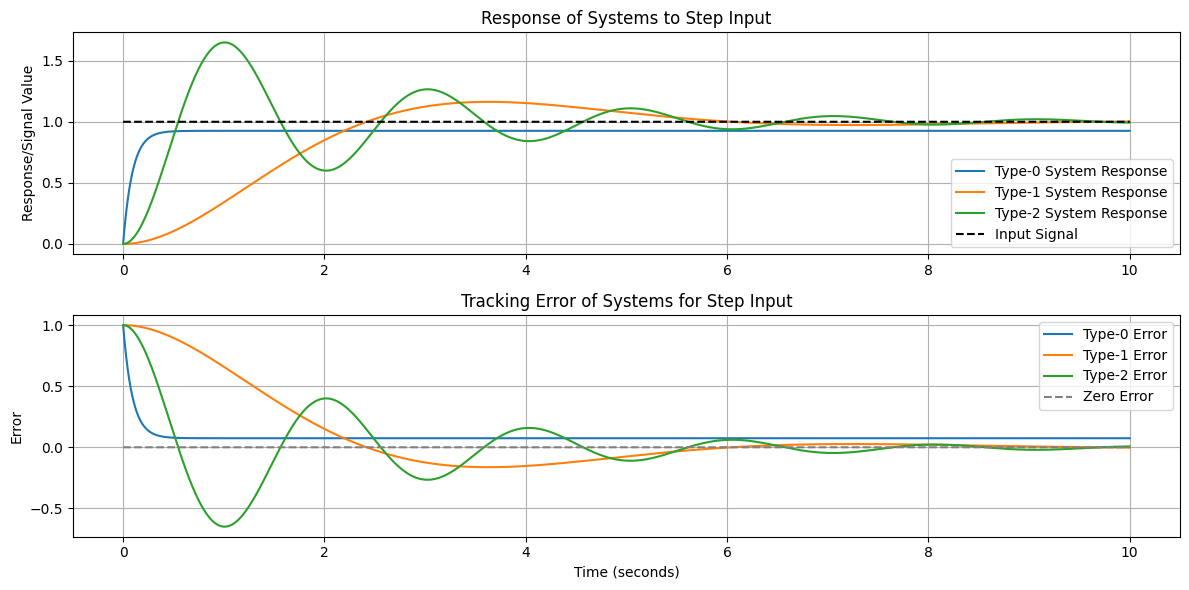

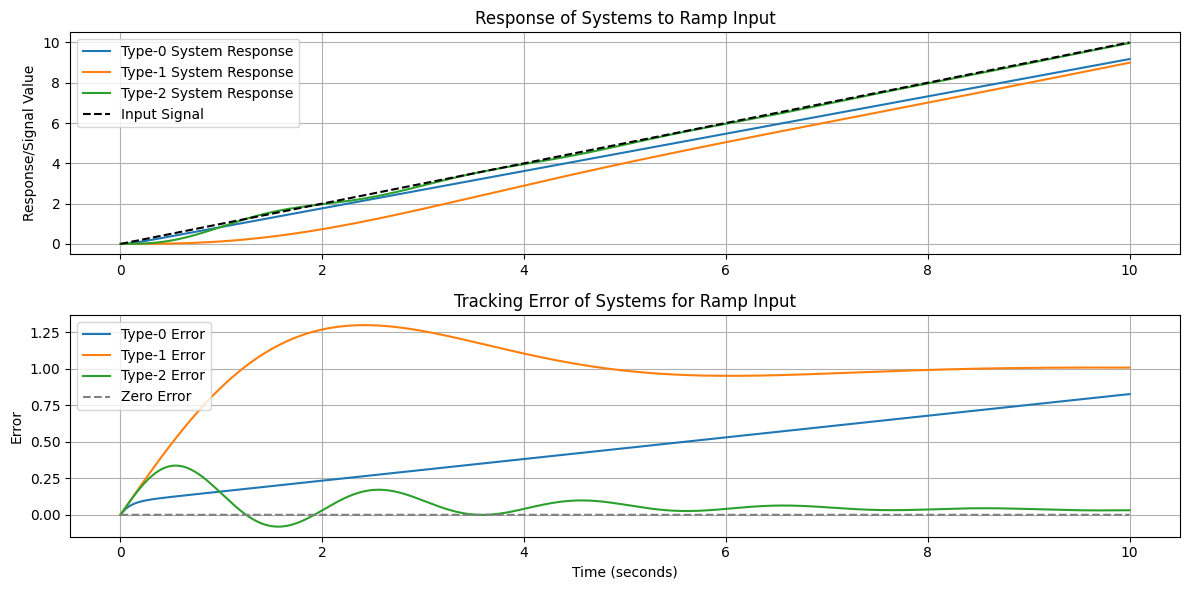

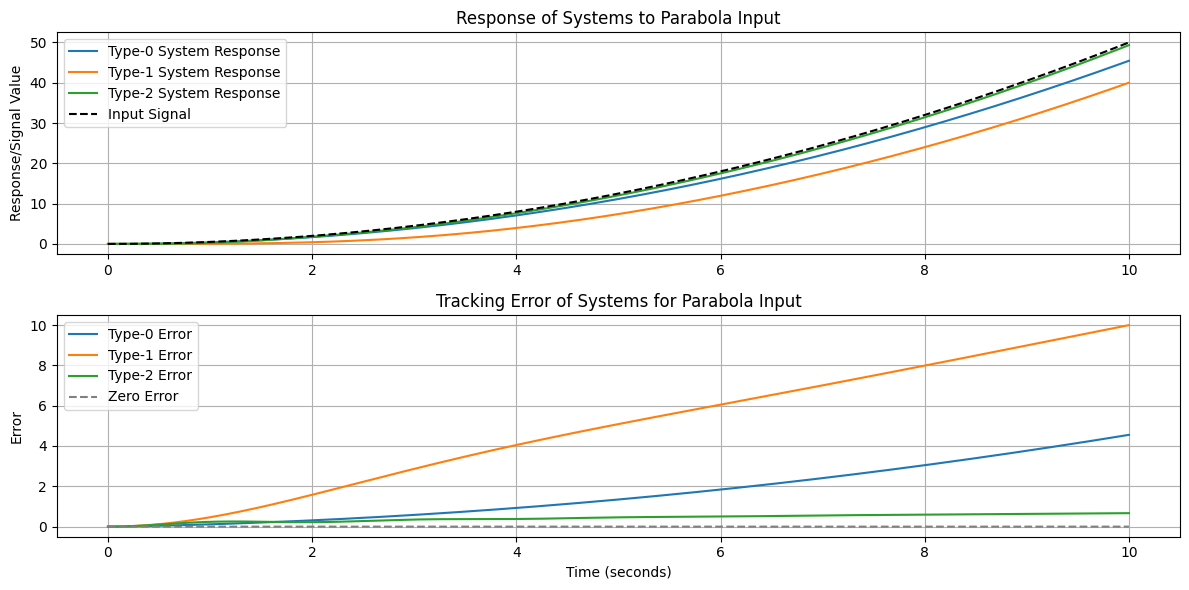

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the time range for simulation
t = np.linspace(0, 10, 2000)

# Open-loop transfer functions
# Type-0 system: K/(s + 0.8)
K_0 = 10
type_0_ol = ctrl.TransferFunction([K_0], [1, 0.8])

# Type-1 system: K/(s(s + 1))
K_1 = 1
type_1_ol = ctrl.TransferFunction([K_1], [1, 1, 0])

# Type-2 system: Double Integrator with damping (1/s^2)
# Adding a small damping factor to stabilize the response
K_2 = 10
damping_factor = 1
type_2_ol = ctrl.TransferFunction([K_2, 1], [1, damping_factor, 0, 0]) # note that we are adding a zero.


# Closed-loop transfer functions
type_0_sys = ctrl.feedback(type_0_ol)
type_1_sys = ctrl.feedback(type_1_ol)
type_2_sys = ctrl.feedback(type_2_ol)



# Function to plot system responses, input signal, and tracking error
def plot_responses_and_errors(systems, t, input_signal, input_type):
    plt.figure(figsize=(12, 6))

    # Plotting system responses and errors
    for i, sys in enumerate(systems):
        t_out, y_out = ctrl.forced_response(sys, T=t, U=input_signal)
        error = input_signal - y_out

        # Plotting response
        plt.subplot(2, 1, 1)
        plt.plot(t_out, y_out, label=f'{["Type-0", "Type-1", "Type-2"][i]} System Response')
        plt.title(f'Response of Systems to {input_type} Input')
        plt.ylabel('Response/Signal Value')
        plt.grid(True)

        # Plotting error
        plt.subplot(2, 1, 2)
        plt.plot(t_out, error, label=f'{["Type-0", "Type-1", "Type-2"][i]} Error')
        plt.title(f'Tracking Error of Systems for {input_type} Input')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Error')
        plt.grid(True)

    # Adding the input signal plot to the response subplot
    plt.subplot(2, 1, 1)
    plt.plot(t, input_signal, label='Input Signal', color='black', linestyle='--')
    plt.legend()

    # Adding the input signal plot to the error subplot (as zero line)
    plt.subplot(2, 1, 2)
    plt.plot(t, np.zeros_like(t), label='Zero Error', color='grey', linestyle='--')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Input signals: unit step, unit ramp, and unit parabola
step_input = np.ones_like(t)
ramp_input = t
parabola_input = 0.5 * t**2

# Systems list and plotting responses with errors
systems = [type_0_sys, type_1_sys, type_2_sys]
plot_responses_and_errors(systems, t, step_input, 'Step')
plot_responses_and_errors(systems, t, ramp_input, 'Ramp')
plot_responses_and_errors(systems, t, parabola_input, 'Parabola')


### Ulteriori commenti

- Generalmente, i requisiti del sistema di controllo presuppongono l'obiettivo di raggiungere un errore di stato stazionario pari a zero per gli ingressi di gradino dell'unità e di mantenere errori finiti per gli ingressi di rampa, a meno che non vengano fornite altre specifiche.

- Nella scelta dei controllori, le caratteristiche intrinseche del sistema guidano la scelta:
   - Se il sistema include naturalmente un integratore, spesso è appropriato utilizzare un controller proporzionale-derivativo (PD). Questa scelta mantiene la tipologia esistente del sistema, migliorandone il controllo senza alterarne il comportamento fondamentale.
   - Al contrario, per i sistemi privi di integratore integrato, un controller Proporzionale-Integrale (PI) è in genere più efficace. Un controller PI introduce un integratore aggiuntivo, aumentando di fatto il numero di tipo del sistema e migliorando così la sua capacità di gestire una gamma più ampia di tipi di input, soprattutto in termini di precisione a regime.

## Esempio di progettazione: uno schema di controllo PID

Applichiamo la nostra conoscenza per progettare un controller PID per un dato impianto. Esamineremo passo dopo passo il processo di progettazione.


<table>
<tr>
    <img src="../pics/21_Steady_State_Accuracy_And_Design_Principles_design_example
.png?1" alt="21_Steady_State_Accuracy_And_Design_Principles_design_example
" style="width:450px;"/>
</tr></table>

### Progettazione di un sistema di controllo della posizione con un controller proporzionale

In un problema di controllo di posizione, il nostro obiettivo è progettare un controllore adeguato $ D(s) $ che garantisca le prestazioni desiderate del sistema. Dato che l'impianto incorpora già un integratore, possiamo iniziare il nostro processo di progettazione con un semplice controllore proporzionale rappresentato come $ D(s) = K_A $.

#### Analisi del sistema combinato

Per un controllore proporzionale $ D(s) = K_A $, la funzione di trasferimento del sistema combinato (controllore e impianto) è:

$$ D(s)G(s) = \frac{4500 K_A}{s(s+361,2)} $$

#### Equazione caratteristica

L’equazione caratteristica di questo sistema a circuito chiuso è:

$$ s^2 + 361,2 s + 4500 K_A = 0 $$

Da questa equazione caratteristica possiamo ricavare importanti parametri di sistema come funzioni di $ K_A $:

- Frequenza naturale ($ \omega_n $): $ \omega_n = \sqrt{4500 K_A} $
- Rapporto di smorzamento ($ \zeta $): $ \zeta = \frac{2.692}{\sqrt{K_A}} $
- Poli del sistema: $ s_{1,2} = -180,6 \pm j\sqrt{32616,36 - 4500 K_A} $
- Errore a regime per l'ingresso della rampa unitaria: $ e_{ss} = \frac{0.0803}{K_A} $

Per un ingresso a gradino unitario, l'errore a regime è zero a causa della presenza dell'integratore nell'impianto.

#### Selezione di $ K_A $ per lo smorzamento critico

Per ottenere uno smorzamento critico ($ \zeta = 1 $), scegliamo:

$$ K_A = 7.247 $$

Questo valore specifico di $ K_A $ si traduce in una risposta criticamente smorzata, ideale per il controllo della posizione poiché garantisce una risposta rapida senza oscillazioni.

Scegliere un guadagno tale che $ \zeta = 1 $ potrebbe portare ad un tempo di assestamento elevato. Si noti inoltre che il tempo di salita è infinito (il sistema arriva a 1 solo quando $t$ va all'infinito).

Per calcolare il tempo di assestamento ricordiamo che l'approssimazione che abbiamo ricavato era valida quando $0<\zeta<0.7$.


### Selezionare $K_A$ per ridurre il rapporto di smorzamento $\zeta$.


Per ottenere uno smorzamento critico ($ \zeta = 0,707 $), scegliamo:

$$ K_A = 14,5 $$

Il che porta ad un superamento massimo:

$$
M_p = 4,3\%
$$

Il tempo di salita in questo caso è inferiore rispetto a prima, e in effetti potrebbe essere il più basso (non ho fatto i calcoli formali).

$M_p = 4,3\%$ è il prezzo che stiamo pagando per un tempo di salita inferiore e potrebbe essere accettabile.

Ricordati che
   $$
   M_p = y(t_p) - 1 = e^{-\zeta\omega_n(\pi/\omega_d)}.
   $$
   

L'errore a regime è:

$$
e_{ss} = \frac{0,0803}{K_A}
$$

il che significa che se vogliamo ridurlo dobbiamo ridurre il valore di $\zeta$ e il picco di superamento aumenta.

Supponiamo ora che la tua esigenza sia:

$$M_p\le25\%$$

Ciò corrisponde ad un rapporto di smorzamento minimo di:

$$
\zeta= 0,4
$$

per cui si ottiene

$$
K_A = 45,3
$$

Ciò riduce l’errore di stato stazionario, ma stiamo anche spostando il sistema verso l’instabilità.

Non c'è nient'altro che possiamo fare con un controller proporzionale senza violare i nostri requisiti.

### Simulazione Python del sistema criticamente smorzato

Ora simuleremo questo sistema criticamente smorzato in Python per visualizzare la sua risposta a un input di passaggio:

Questo script simula e traccia la risposta al gradino del sistema di controllo della posizione con un controller proporzionale impostato per lo smorzamento critico. Il valore scelto di $ K_A $ garantisce che il sistema venga smorzato in modo critico, ottenendo così una risposta rapida e stabile ai cambiamenti nell'input senza overshooting.

Usa il codice qui sotto per provare:

- $K_A = 7.247$
- $K_A = 14.5$

verificare qual è il tempo di salita associato, l'errore di stato stazionario e il superamento massimo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import ipywidgets as widgets
from IPython.display import display

# Function to plot the step response for a given K_A
def plot_step_response(K_A):
    # Transfer function of the system
    G_s = ctrl.TransferFunction([4500 * K_A], [1, 361.2, 4500 * K_A])

    # Time range for simulation
    t = np.linspace(0, 0.4, 500)

    # Simulate step response
    t, y = ctrl.step_response(G_s, T=t)
    
    # steady state error
    e_ss = 0.0803/K_A
    
    # Peak overshoot
    omega_n = np.sqrt(4500*K_A)
    zeta = 2.692/np.sqrt(K_A)
    omega_d = omega_n * np.sqrt(1 - zeta**2)
    #M_p = np.exp(-zeta*omega_n*np.pi/omega_d)
    M_p = np.exp(-np.pi*zeta/(np.sqrt(1-zeta**2)))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t, y)
    plt.title(f'Step Response with Proportional Gain K_A = {K_A:.2f}, e_ss = {e_ss:.4f}, M_p % = {M_p*100:.1f}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Response')
    plt.grid()
    plt.show()

# Create a slider for K_A
K_A_slider = widgets.FloatSlider(
    value=7.247,
    min=0.1,
    max=47.0,
    step=0.1,
    description='K_A Slider:',
    continuous_update=False
)

# Create a text box for K_A
K_A_text = widgets.FloatText(
    value=7.247,
    description='K_A Text:',
)

# Function to synchronize slider and text box values
def on_value_change(change):
    K_A_slider.value = change.new
    K_A_text.value = change.new

K_A_slider.observe(on_value_change, names='value')
K_A_text.observe(on_value_change, names='value')

# Use `interactive` to bind the plot function to both the slider and the text box
display(widgets.interactive(plot_step_response, K_A=K_A_slider))
display(K_A_text)


interactive(children=(FloatSlider(value=7.247, continuous_update=False, description='K_A Slider:', max=47.0, m…

FloatText(value=7.247, description='K_A Text:')

### Miglioramento delle prestazioni: progettazione migliorata del sistema di controllo con controller PD e PI

1. **Controllo PD:**
   - **Panoramica:** L'aggiunta di un termine derivato nel controllo PD influenza in modo significativo le caratteristiche di smorzamento del sistema. Anche se non riduce direttamente l'errore in stato stazionario, l'azione derivativa gioca un ruolo cruciale nel migliorare la stabilità e la risposta del sistema.
   - **Impatto sulla progettazione:** Incorporando un termine derivato, il controllo PD consente un aumento del guadagno proporzionale $ K_A $ senza violare i vincoli di superamento massimo. Nello specifico, lo smorzamento potenziato fornito dal termine derivato consente al sistema di tollerare un $ K_A $ più elevato, consentendo di mantenere l'overshoot entro il limite desiderato del 25%.
   - **Formula del controller:** $ D(s) = K_C + K_Ds $, dove $ K_C $ è il guadagno proporzionale e $ K_D $ è il guadagno derivativo.

2. **Controllo PI:**
   - **Panoramica:** Il controllo PI introduce un integratore nello schema di controllo, mirato direttamente alla riduzione dell'errore in stato stazionario, particolarmente efficace nell'eliminare gli errori di offset in varie applicazioni di controllo.
   - **Bilanciamento delle prestazioni transitorie e stazionarie:** sebbene un controller PI sia in grado di ridurre al minimo l'errore allo stato stazionario, è necessaria un'attenta regolazione per garantire che siano soddisfatti anche i criteri delle prestazioni transitorie, come il tempo di assestamento e il superamento.
    - Per il caso di controllo PI (proporzionale-integrale), il controller $ D(s) $ è tipicamente formulato come una combinazione di un termine proporzionale e di un termine integrale. La forma generale di un controller PI nel dominio di Laplace è:

$$ D(s) = K_P + \frac{K_I}{s} $$

Dove:
- $ K_P $ è il guadagno proporzionale.
- $ K_I $ è il guadagno integrale.

Il termine proporzionale $ K_P $ fornisce un'azione di controllo proporzionale al segnale di errore, offrendo una risposta immediata ai cambiamenti nel sistema. Il termine integrale $ \frac{K_I}{s} $ accumula l'errore nel tempo, con l'obiettivo di eliminare l'errore a regime. La combinazione di queste due azioni consente al controller PI di reagire tempestivamente ai cambiamenti del sistema e di ridurre metodicamente qualsiasi errore persistente.

In un sistema di controllo pratico, la regolazione dei valori di $ K_P $ e $ K_I $ è fondamentale per raggiungere l'equilibrio desiderato tra risposta rapida e precisione a regime, garantendo che il sistema soddisfi effettivamente le specifiche prestazionali.


### Progettazione avanzata di controllori: metodi del luogo delle radici e della risposta in frequenza

Nelle nostre prossime discussioni, approfondiremo metodi più formalizzati per la progettazione dei controller, vale a dire il metodo del luogo delle radici e il metodo della risposta in frequenza. Queste tecniche forniscono potenti strumenti per analizzare e progettare sistemi di controllo, permettendoci di:

- Modella con precisione la risposta del sistema regolando i parametri del controller.
- Valutare visivamente i compromessi in termini di stabilità e prestazioni.
- Ottimizzare i controller per ottenere un equilibrio desiderabile tra risposta ai transitori e precisione allo stato stazionario.

Attraverso questi metodi, possiamo sviluppare una comprensione più profonda della dinamica dei sistemi di controllo e progettare controller che si adattano in modo ottimale ai requisiti specifici delle nostre applicazioni.

#### PD control

Per modificare il codice per utilizzare un controller descritto da $ D(s) = K_C + K_Ds $, che è un controller proporzionale-derivativo (PD), dobbiamo aggiornare di conseguenza la funzione di trasferimento del sistema combinato (controller e impianto).

Supponendo che la funzione di trasferimento dell'impianto rimanga la stessa dell'esempio precedente, la funzione di trasferimento combinata del sistema con il controllore PD sarà:

$$ D(s)G(s) = \frac{(K_C + K_Ds) \cdot 4500K_A}{s(s+361.2)} $$

Aggiorniamo lo script Python per incorporare questo controller PD. Aggiungeremo cursori sia per $ K_C $ (guadagno proporzionale) che per $ K_D $ (guadagno derivativo) per osservare in modo interattivo la risposta del sistema.

Lo script seguente consente di regolare dinamicamente il guadagno proporzionale $ K_C $ e il guadagno derivativo $ K_D $ del controller PD utilizzando i cursori. La risposta al gradino del sistema si aggiornerà in base a questi valori, aiutandoti a visualizzare come il controller PD influisce sul comportamento del sistema. Ricorda, questa funzionalità interattiva funziona in un ambiente notebook Jupyter.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import ipywidgets as widgets
from IPython.display import display

# Function to plot the step response for given K_C and K_D
def plot_step_response(K_C, K_D):
    # PD controller transfer function
    D_s = ctrl.TransferFunction([K_D, K_C], [1])

    # Plant transfer function
    G_s = ctrl.TransferFunction([4500], [1, 361.2, 0])

    # Combined system transfer function
    system = ctrl.series(D_s, G_s)
    closed_loop_system = ctrl.feedback(system)

    # Time range for simulation
    t = np.linspace(0, 2, 500)

    # Simulate step response
    t, y = ctrl.step_response(closed_loop_system, T=t)

    # Peak overshoot (M_p) and steady-state error (e_ss) calculations
    e_ss = 0.0803 / K_C  # Assuming K_C is dominant for steady-state error
    peak = np.max(y)
    M_p = ((peak - 1) / 1) * 100  # Peak overshoot in percentage

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t, y)
    plt.title(f'Step Response with K_C = {K_C:.2f}, K_D = {K_D:.2f}, e_ss = {e_ss:.4f}, M_p % = {M_p:.1f}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Response')
    plt.grid()
    plt.show()

# Sliders for K_C and K_D
K_C_slider = widgets.FloatSlider(value=1.0, min=0.1, max=10, step=0.1, description='K_C:')
# K_D_slider = widgets.FloatSlider(value=1.0, min=0.1, max=10, step=0.1, description='K_D:')
K_D_slider = widgets.FloatSlider(value=.1, min=0, max=2, step=0.1, description='K_D:')

# Interactive plot
widgets.interactive(plot_step_response, K_C=K_C_slider, K_D=K_D_slider)


interactive(children=(FloatSlider(value=1.0, description='K_C:', max=10.0, min=0.1), FloatSlider(value=0.1, de…

#### Controllo PI

Per modificare il codice per un controllo PI, dobbiamo cambiare la funzione di trasferimento del controller per rappresentare un controller PI e regolare i calcoli di conseguenza. Il controller PI ha la forma $ D(s) = K_P + \frac{K_I}{s} $, dove $ K_P $ è il guadagno proporzionale e $ K_I $ è il guadagno integrale.

Per semplicità, supponiamo che $ K_P $ e $ K_I $ siano uguali e rappresentati dalla stessa variabile $ K_A $ nello script. La funzione di trasferimento del controller PI sarà quindi $ D(s) = K_A + \frac{K_A}{s} $. Dobbiamo anche aggiornare la funzione di trasferimento del sistema combinato e regolare i calcoli per l’errore di stato stazionario e il superamento del picco.

L'errore a regime per un ingresso a gradino è zero a causa dell'integratore nel controller PI. Il calcolo analitico del superamento del picco per un controller PI può essere complesso e viene spesso eseguito utilizzando metodi numerici o graficamente dal grafico della risposta. Lo script ora utilizza cursori interattivi per consentire di regolare $ K_A $ e osservare la risposta del sistema.

Ecco lo script modificato:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import ipywidgets as widgets
from IPython.display import display

# Function to plot the step response for a given K_A
def plot_step_response(K_A):
    # PI controller transfer function: D(s) = K_A + K_A/s
    D_s = ctrl.TransferFunction([K_A, K_A], [1, 0])

    # Plant transfer function: G(s) = 4500/(s(s+361.2))
    G_s = ctrl.TransferFunction([4500], [1, 361.2, 0])

    # Combined system transfer function
    system = ctrl.series(D_s, G_s)
    closed_loop_system = ctrl.feedback(system)

    # Time range for simulation
    t = np.linspace(0, 2, 500)

    # Simulate step response
    t, y = ctrl.step_response(closed_loop_system, T=t)
    
    # Steady-state error is zero for a step input due to the integrator in PI controller
    e_ss = 0.0
    
    # Peak overshoot calculation is not straightforward for a PI controller
    # and typically requires numerical methods or graphically from the plot

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t, y)
    plt.title(f'Step Response with PI Gain K_A = {K_A:.2f}, e_ss = {e_ss:.4f}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Response')
    plt.grid()
    plt.show()

# Create a slider for K_A
K_A_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=10.0,
    step=0.1,
    description='K_A Slider:',
    continuous_update=False
)

# Create a text box for K_A
K_A_text = widgets.FloatText(
    value=1.0,
    description='K_A Text:',
)

# Function to synchronize slider and text box values
def on_value_change(change):
    K_A_slider.value = change.new
    K_A_text.value = change.new

K_A_slider.observe(on_value_change, names='value')
K_A_text.observe(on_value_change, names='value')

# Use `interactive` to bind the plot function to both the slider and the text box
display(widgets.interactive(plot_step_response, K_A=K_A_slider))
display(K_A_text)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='K_A Slider:', max=10.0, min…

FloatText(value=1.0, description='K_A Text:')